# A model for each income 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

## A dataframe for each income

* fisher_pd
* farmer_pd
* retired_pd
* craftsman_pd
* civil_pd
* homemaker_pd
* child_pd

In [2]:
all_profession = pd.read_csv('population_matka_bots_year110.csv')
all_profession.head()
all_profession['profession'].unique()

array(['civil servant', 'child', 'unemployed', 'farmer', 'homemaker',
       'fisher', 'craftsman', 'service provider', 'retired'], dtype=object)

## Fishers 
Estimate equation of patterns: 

In [3]:
fisher_pd = all_profession[all_profession['profession'] == 'fisher']
fisher_pd = fisher_pd.reset_index(drop=False)
fisher_pd.head()

,index,year,sex,profession,income,net_worth,happiness
0,9,0,M,fisher,1381.20,10000.0,100.0
1,11,0,F,fisher,1289.44,10000.0,100.0
2,34,0,M,fisher,2372.70,10000.0,100.0
3,58,0,M,fisher,2603.16,10000.0,100.0
4,63,0,F,fisher,1288.57,10000.0,100.0


In [4]:
fisher_year_income = np.round(fisher_pd.groupby('year')['income'].mean().reset_index(), 2)
fisher_year_income = fisher_year_income.rename(columns={'income': 'avg_income'})
# a collumn with the sum of all income
fisher_year_income['sum_income'] = np.round(fisher_pd.groupby('year')['income'].sum().values, 2)
fisher_year_income['num_fishers'] = np.round(fisher_pd.groupby('year')['income'].count().values, 2)
fisher_year_income['avg_income_per_fisher'] = np.round(fisher_year_income['sum_income'] / fisher_year_income['num_fishers'], 2)
fisher_year_income['avg_net_worth'] = np.round(fisher_pd.groupby('year')['net_worth'].mean().values, 2)
fisher_year_income['sum_net_worth'] = np.round(fisher_pd.groupby('year')['net_worth'].sum().values, 2)
fisher_year_income['avg_net_worth_per_fisher'] = np.round(fisher_year_income['sum_net_worth'] / fisher_year_income['num_fishers'], 2)

#reorder the collumns 
order_columns = ['year', 'num_fishers', 'avg_income', 'sum_income', 'avg_income_per_fisher', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_fisher']
fisher_year_income = fisher_year_income[order_columns]

fisher_year_income.head(15)


,year,num_fishers,avg_income,sum_income,avg_income_per_fisher,avg_net_worth,sum_net_worth,avg_net_worth_per_fisher
0,0,53,2232.42,118318.22,2232.42,10000.00,530000.00,10000.00
1,1,50,2218.97,110948.32,2218.97,10835.56,541778.04,10835.56
2,2,48,2227.71,106930.26,2227.71,11651.59,559276.47,11651.59
3,3,47,2184.15,102654.87,2184.15,12365.75,581190.02,12365.75
4,4,45,3760.24,169210.61,3760.24,13899.41,625473.55,13899.41
5,5,46,2026.52,93219.87,2026.52,14572.00,670311.86,14572.00
6,6,45,2142.36,96406.24,2142.36,15302.35,688605.63,15302.35
7,7,45,3760.81,169236.27,3760.81,16529.88,743844.38,16529.88
8,8,46,2059.17,94721.90,2059.17,17176.23,790106.42,17176.23
9,9,47,2290.02,107630.93,2290.02,17592.46,826845.68,17592.46


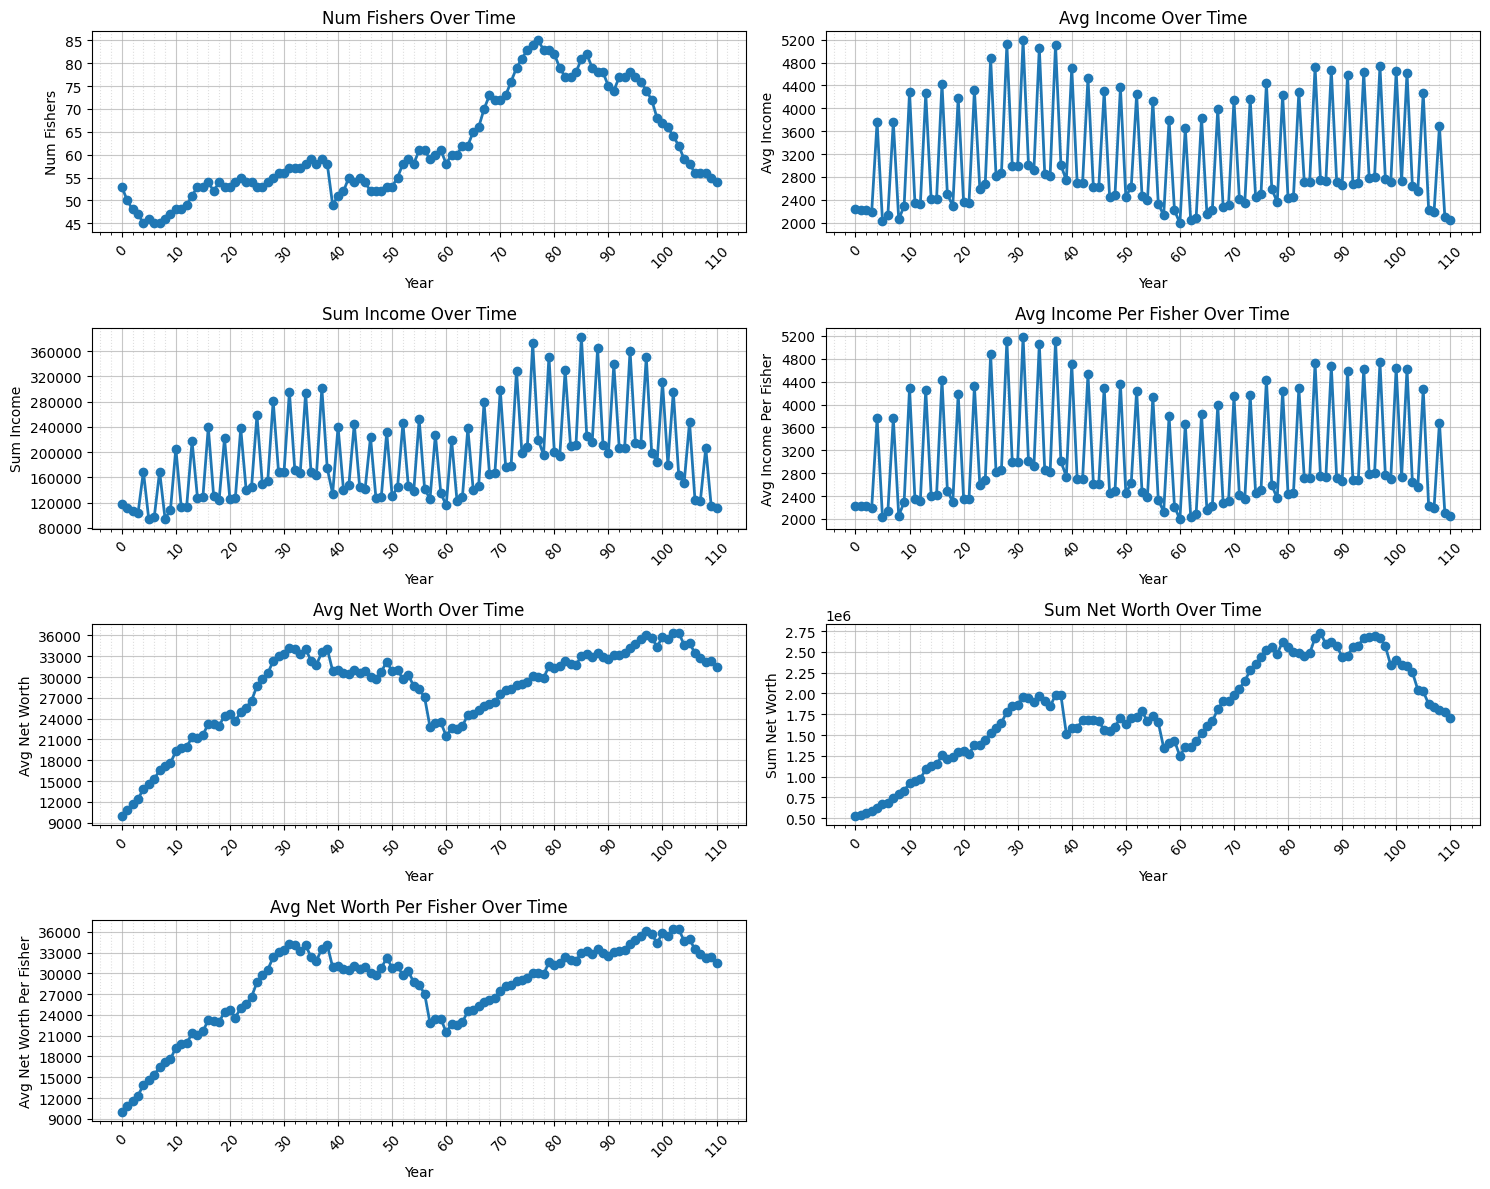

In [5]:
#graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in fisher_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(fisher_year_income['year'], fisher_year_income[var], marker='o', linewidth=2)
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Possible pattern

avg_income = baseline + amplitude * sin(2π * year / period) + spike_pattern

### Fisher Income Model

**Observed Patterns:**
1. **3-year fishing cycle**: 1 good year (year 5, 8, 11...) followed by 2 bad years
2. **Long-term sine wave**: ~55-year period with peaks around years 25-30 and 80-85
3. **Baseline**: ~3200 (central tendency)
4. **Amplitude**: ~800-1000 for the sine wave
5. **Spike amplitude**: +600 for good fishing years, -300 for bad years

**Proposed Equation:**
```
avg_income = baseline + amplitude * sin(2π * year / period) + fishing_cycle_spike
```
baseline=3200, amplitude=300, period=57, good_spike=925, bad_spike=-750

Best Parameters:
  Baseline: 3300
  Amplitude: 425
  Period: 59
  Good Year Spike: 975
  Bad Year Spike: -825

In [6]:
# Model Fisher Average Income
def fisher_income_model(year):
    """
    Model for fisher average income based on observed patterns
    """
    # Parameters
    baseline = 3300
    amplitude = 425
    period = 59
    good_year_spike = 975
    bad_year_spike = -825
    
    # Long-term sine wave component
    long_wave = baseline + amplitude * -(np.cos(2 * np.pi * year / period))
    
    if year < 100:
        # Normal 3-year fishing cycle (good year starting at year 5, then 8, 11, etc.)
        if year >= 4 and (year - 4) % 3 == 0:
            spike = good_year_spike
        elif year >= 4:
            spike = bad_year_spike
        else:
            spike = 0
    elif year == 100:
        spike = good_year_spike  # Year 100 is good (anomaly)
    elif year == 101:
        spike = bad_year_spike   # Year 101 is bad
    elif year == 102:
        spike = good_year_spike  # Year 102 is good
    else:
        # After year 102, cycle shifts: 103 bad, 104 bad, 105 good, 106 bad, 107 bad, 108 good...
        # Good years are now 105, 108, 111, ... which is (year - 105) % 3 == 0
        if (year - 105) % 3 == 0:
            spike = good_year_spike
        else:
            spike = bad_year_spike
    
    return long_wave + spike

# Generate model predictions for all years
fisher_year_income['model_avg_income'] = fisher_year_income['year'].apply(fisher_income_model)

# Calculate error metrics
fisher_year_income['error'] = fisher_year_income['avg_income'] - fisher_year_income['model_avg_income']
fisher_year_income['abs_error'] = np.abs(fisher_year_income['error'])
fisher_year_income['pct_error'] = np.round(100 * fisher_year_income['error'] / fisher_year_income['avg_income'], 2)

# Display statistics
print(f"Mean Absolute Error: {fisher_year_income['abs_error'].mean():.2f}")
print(f"Mean Percentage Error: {fisher_year_income['pct_error'].mean():.2f}%")
print(f"Max Error: {fisher_year_income['abs_error'].max():.2f}")

fisher_year_income[['year', 'avg_income', 'model_avg_income', 'error', 'pct_error']].head(20)

Mean Absolute Error: 171.06
Mean Percentage Error: -1.09%
Max Error: 712.36


,year,avg_income,model_avg_income,error,pct_error
0,0,2232.42,2875.000000,-642.580000,-28.78
1,1,2218.97,2877.407710,-658.437710,-29.67
2,2,2227.71,2884.603559,-656.893559,-29.49
3,3,2184.15,2896.506016,-712.356016,-32.61
4,4,3760.24,3887.980222,-127.740222,-3.40
5,5,2026.52,2108.839515,-82.319515,-4.06
6,6,2142.36,2133.847554,8.512446,0.40
7,7,3760.81,3962.720986,-201.910986,-5.37
8,8,2059.17,2195.132664,-135.962664,-6.60
9,9,2290.02,2230.715351,59.304649,2.59


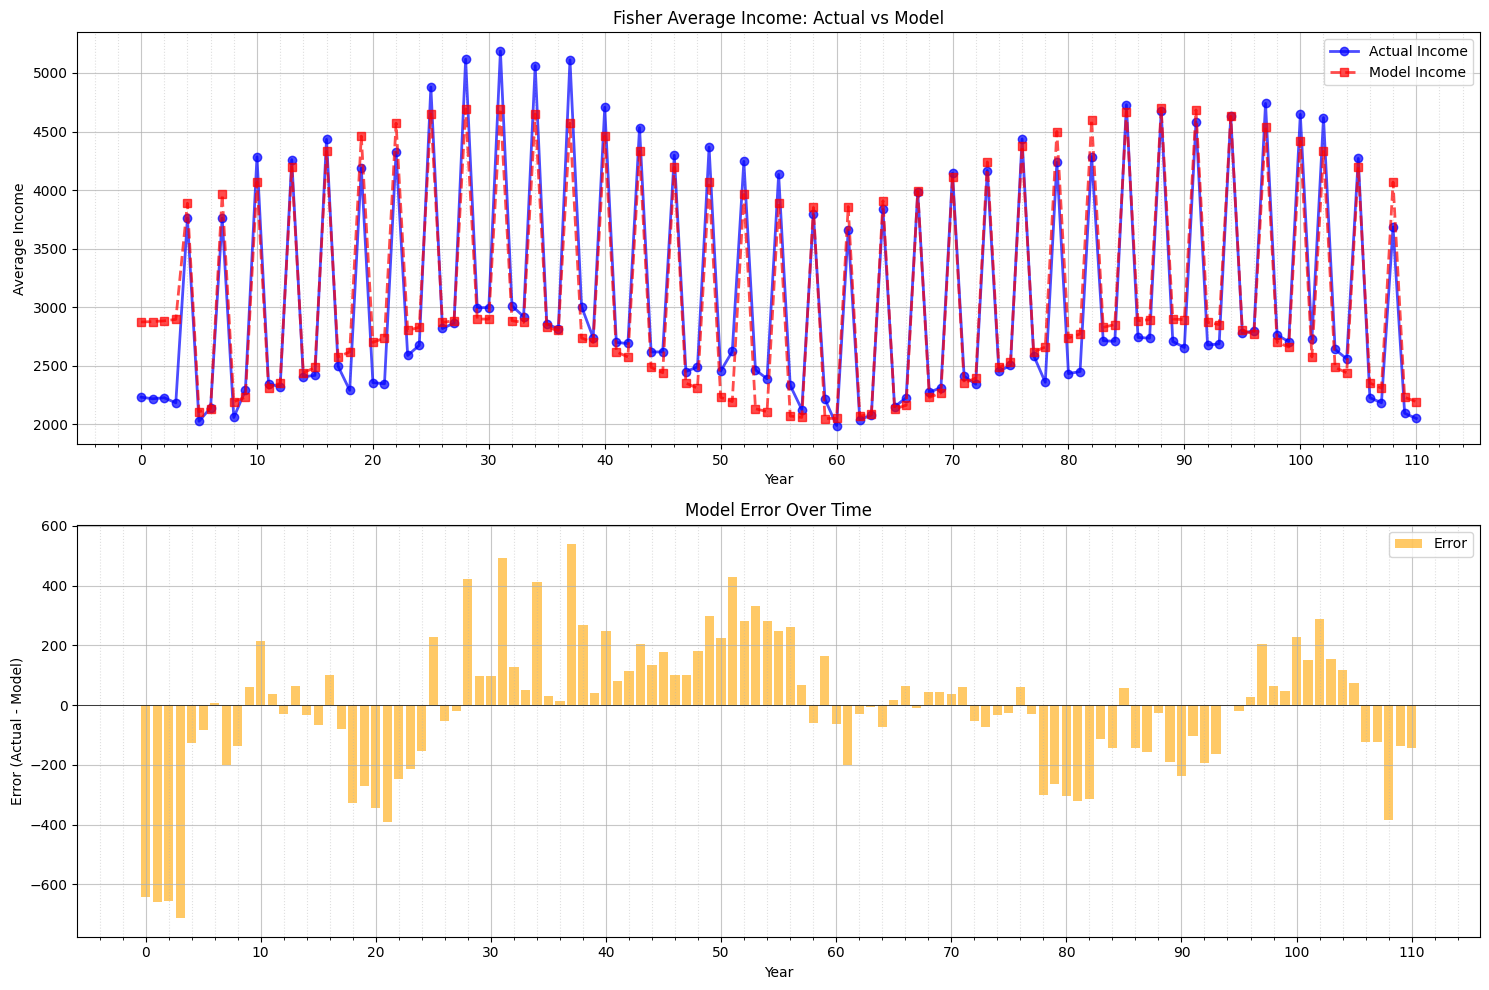

In [7]:
# Visualize actual vs modeled fisher income
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot 1: Actual vs Model
ax1 = axes[0]
ax1.plot(fisher_year_income['year'], fisher_year_income['avg_income'], 
         marker='o', linewidth=2, label='Actual Income', color='blue', alpha=0.7)
ax1.plot(fisher_year_income['year'], fisher_year_income['model_avg_income'], 
         marker='s', linewidth=2, label='Model Income', color='red', alpha=0.7, linestyle='--')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income')
ax1.set_title('Fisher Average Income: Actual vs Model')
ax1.legend()
ax1.grid(True, which='major', linestyle='-', alpha=0.7)
ax1.grid(True, which='minor', linestyle=':', alpha=0.4)
ax1.xaxis.set_major_locator(plt.MultipleLocator(10))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(2))

# Plot 2: Error over time
ax2 = axes[1]
ax2.bar(fisher_year_income['year'], fisher_year_income['error'], 
        color='orange', alpha=0.6, label='Error')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_xlabel('Year')
ax2.set_ylabel('Error (Actual - Model)')
ax2.set_title('Model Error Over Time')
ax2.legend()
ax2.grid(True, which='major', linestyle='-', alpha=0.7)
ax2.grid(True, which='minor', linestyle=':', alpha=0.4)
ax2.xaxis.set_major_locator(plt.MultipleLocator(10))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(2))

plt.tight_layout()
plt.show()

In [8]:
# Hyperparameter Tuning for Fisher Income Model
from itertools import product

def evaluate_fisher_model(params, data):
    """
    Evaluate model with given parameters and return mean squared error
    
    Parameters:
    - params: dict with keys 'baseline', 'amplitude', 'period', 'good_spike', 'bad_spike'
    - data: DataFrame with 'year' and 'avg_income' columns
    
    Returns:
    - mse: mean squared error
    """
    baseline, amplitude, period, good_spike, bad_spike = params
    
    def model(year):
        long_wave = baseline + amplitude * -(np.cos(2 * np.pi * year / period))
        
        if year < 100:
            if year >= 4 and (year - 4) % 3 == 0:
                spike = good_spike
            elif year >= 4:
                spike = bad_spike
            else:
                spike = 0
        elif year == 100:
            spike = good_spike
        elif year == 101:
            spike = bad_spike
        elif year == 102:
            spike = good_spike
        else:
            if (year - 105) % 3 == 0:
                spike = good_spike
            else:
                spike = bad_spike
        
        return long_wave + spike
    
    # Calculate predictions
    predictions = data['year'].apply(model)
    
    # Calculate MSE
    mse = np.mean((data['avg_income'] - predictions) ** 2)
    
    return mse

def tune_fisher_hyperparameters(data, param_ranges, verbose=True):
    """
    Grid search to find best hyperparameters
    
    Parameters:
    - data: DataFrame with 'year' and 'avg_income'
    - param_ranges: dict with parameter ranges
        {
            'baseline': [min, max, step],
            'amplitude': [min, max, step],
            'period': [min, max, step],
            'good_spike': [min, max, step],
            'bad_spike': [min, max, step]
        }
    - verbose: whether to print progress
    
    Returns:
    - best_params: tuple of best parameters
    - best_mse: best mean squared error
    - results_df: DataFrame with all tested combinations
    """
    # Generate parameter combinations
    baseline_range = np.arange(*param_ranges['baseline'])
    amplitude_range = np.arange(*param_ranges['amplitude'])
    period_range = np.arange(*param_ranges['period'])
    good_spike_range = np.arange(*param_ranges['good_spike'])
    bad_spike_range = np.arange(*param_ranges['bad_spike'])
    
    # Create all combinations
    param_combinations = list(product(
        baseline_range,
        amplitude_range,
        period_range,
        good_spike_range,
        bad_spike_range
    ))
    
    total_combinations = len(param_combinations)
    if verbose:
        print(f"Testing {total_combinations} parameter combinations...")
    
    # Track results
    results = []
    best_mse = float('inf')
    best_params = None
    
    # Test each combination
    for i, params in enumerate(param_combinations):
        mse = evaluate_fisher_model(params, data)
        
        results.append({
            'baseline': params[0],
            'amplitude': params[1],
            'period': params[2],
            'good_spike': params[3],
            'bad_spike': params[4],
            'mse': mse
        })
        
        if mse < best_mse:
            best_mse = mse
            best_params = params
            if verbose:
                print(f"New best MSE: {best_mse:.2f} at combination {i+1}/{total_combinations}")
                print(f"  Parameters: baseline={params[0]}, amplitude={params[1]}, period={params[2]}, "
                      f"good_spike={params[3]}, bad_spike={params[4]}")
    
    # Create results DataFrame
    results_df = pd.DataFrame(results).sort_values('mse')
    
    if verbose:
        print("\n" + "="*70)
        print("HYPERPARAMETER TUNING COMPLETE")
        print("="*70)
        print(f"\nBest Parameters:")
        print(f"  Baseline: {best_params[0]}")
        print(f"  Amplitude: {best_params[1]}")
        print(f"  Period: {best_params[2]}")
        print(f"  Good Year Spike: {best_params[3]}")
        print(f"  Bad Year Spike: {best_params[4]}")
        print(f"\nBest MSE: {best_mse:.2f}")
        print(f"Best RMSE: {np.sqrt(best_mse):.2f}")
    
    return best_params, best_mse, results_df

# Define parameter ranges to search
# Format: [min, max, step]
param_ranges = {
    'baseline': [3200, 3400, 25],      # Test 3200, 3225, 3250, 3275, 3300, 3325, 3350, 3375
    'amplitude': [300, 450, 25],        # Test 300, 325, 350, 375, 400, 425
    'period': [54, 60, 1],              # Test 54, 55, 56, 57, 58, 59
    'good_spike': [800, 1000, 25],      # Test 800, 825, 850, 875, 900, 925, 950, 975
    'bad_spike': [-900, -700, 25]       # Test -900, -875, -850, -825, -800, -775, -750, -725
}

# Run hyperparameter tuning
best_params, best_mse, results_df = tune_fisher_hyperparameters(
    fisher_year_income[['year', 'avg_income']], 
    param_ranges,
    verbose=True
)

# Display top 10 parameter combinations
print("\nTop 10 Parameter Combinations:")
print(results_df.head(10))

Testing 18432 parameter combinations...
New best MSE: 162962.79 at combination 1/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-900
New best MSE: 156960.45 at combination 2/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-875
New best MSE: 151757.65 at combination 3/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-850
New best MSE: 147354.41 at combination 4/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-825
New best MSE: 143750.71 at combination 5/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-800
New best MSE: 140946.57 at combination 6/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-775
New best MSE: 138941.97 at combination 7/18432
  Parameters: baseline=3200, amplitude=300, period=54, good_spike=800, bad_spike=-750
New best MSE: 137736.93 at co

## Farmers

In [9]:
# Filter for farmers
farmer_pd = all_profession[all_profession['profession'] == 'farmer']
farmer_pd = farmer_pd.reset_index(drop=True)

# Create summary statistics by year
farmer_year_income = np.round(farmer_pd.groupby('year')['income'].mean().reset_index(), 2)
farmer_year_income = farmer_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
farmer_year_income['sum_income'] = np.round(farmer_pd.groupby('year')['income'].sum().values, 2)
farmer_year_income['num_farmers'] = np.round(farmer_pd.groupby('year')['income'].count().values, 2)
farmer_year_income['avg_income_per_farmer'] = np.round(farmer_year_income['sum_income'] / farmer_year_income['num_farmers'], 2)
farmer_year_income['avg_net_worth'] = np.round(farmer_pd.groupby('year')['net_worth'].mean().values, 2)
farmer_year_income['sum_net_worth'] = np.round(farmer_pd.groupby('year')['net_worth'].sum().values, 2)
farmer_year_income['avg_net_worth_per_farmer'] = np.round(farmer_year_income['sum_net_worth'] / farmer_year_income['num_farmers'], 2)

# Reorder the columns 
order_columns = ['year', 'num_farmers', 'avg_income', 'sum_income', 'avg_income_per_farmer', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_farmer']
farmer_year_income = farmer_year_income[order_columns]

# Display first 15 rows
farmer_year_income.head(15)

,year,num_farmers,avg_income,sum_income,avg_income_per_farmer,avg_net_worth,sum_net_worth,avg_net_worth_per_farmer
0,0,73,2182.73,159339.04,2182.73,10000.00,730000.00,10000.00
1,1,75,2212.96,165972.21,2212.96,10832.56,812441.90,10832.56
2,2,75,2243.49,168261.99,2243.49,11660.32,874524.18,11660.32
3,3,77,637.74,49106.05,637.74,11649.66,897023.90,11649.66
4,4,75,1987.35,149051.48,1987.35,12259.12,919434.09,12259.12
5,5,75,2038.61,152895.40,2038.61,13022.52,976688.97,13022.52
6,6,75,1862.83,139712.40,1862.83,13618.98,1021423.67,13618.98
7,7,75,872.61,65445.64,872.61,13731.85,1029888.97,13731.85
8,8,76,874.13,66433.98,874.13,13783.41,1047538.84,13783.41
9,9,75,1979.79,148484.01,1979.79,14246.15,1068461.08,14246.15


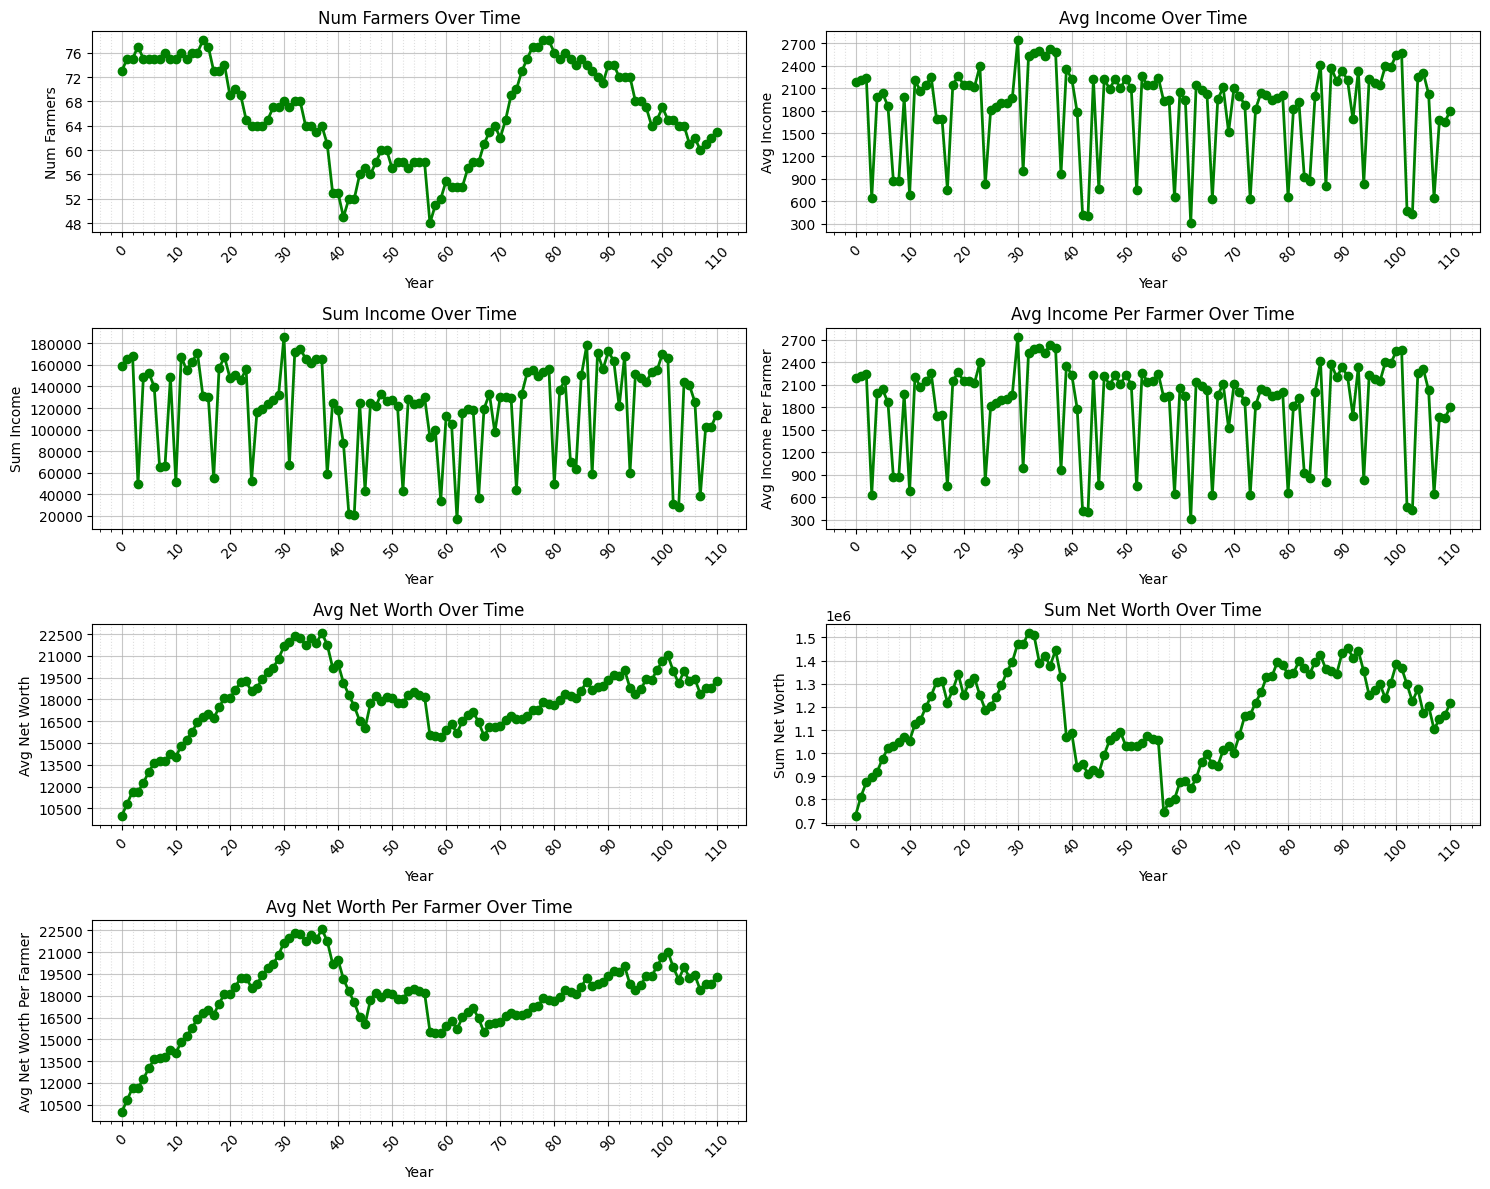

In [10]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in farmer_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(farmer_year_income['year'], farmer_year_income[var], marker='o', linewidth=2, color='green')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

STEP 1: IDENTIFY LOCUST INFESTATION YEARS

Years with low income (< 1686.81):
[  3   7   8  10  17  24  31  38  42  43  45  52  59  62  66  69  73  80
  83  84  87  92  94 102 103 107 108 109]

Differences between consecutive low years:
[4 1 2 7 7 7 7 4 1 2 7 7 3 4 3 4 7 3 1 3 5 2 8 1 4 1 1]
Average interval: 3.93 years
Most common interval: ModeResult(mode=np.int64(3), count=np.int64(1))

STEP 2: CATEGORIZE YEARS BY INCOME LEVEL

Income distribution by category:
income_level
Low (Locust)    24
Medium           7
High            79
Name: count, dtype: int64

Year-by-year pattern (first 30 years):
Year   0: 🌾 2182.73 - High
Year   1: 🌾 2212.96 - High
Year   2: 🌾 2243.49 - High
Year   3: 🦗 637.74 - Low (Locust)
Year   4: 🌾 1987.35 - High
Year   5: 🌾 2038.61 - High
Year   6: 🌾 1862.83 - High
Year   7: 🦗 872.61 - Low (Locust)
Year   8: 🦗 874.13 - Low (Locust)
Year   9: 🌾 1979.79 - High
Year  10: 🦗 686.14 - Low (Locust)
Year  11: 🌾 2207.97 - High
Year  12: 🌾 2067.58 - High
Year  13: 🌾 2146.

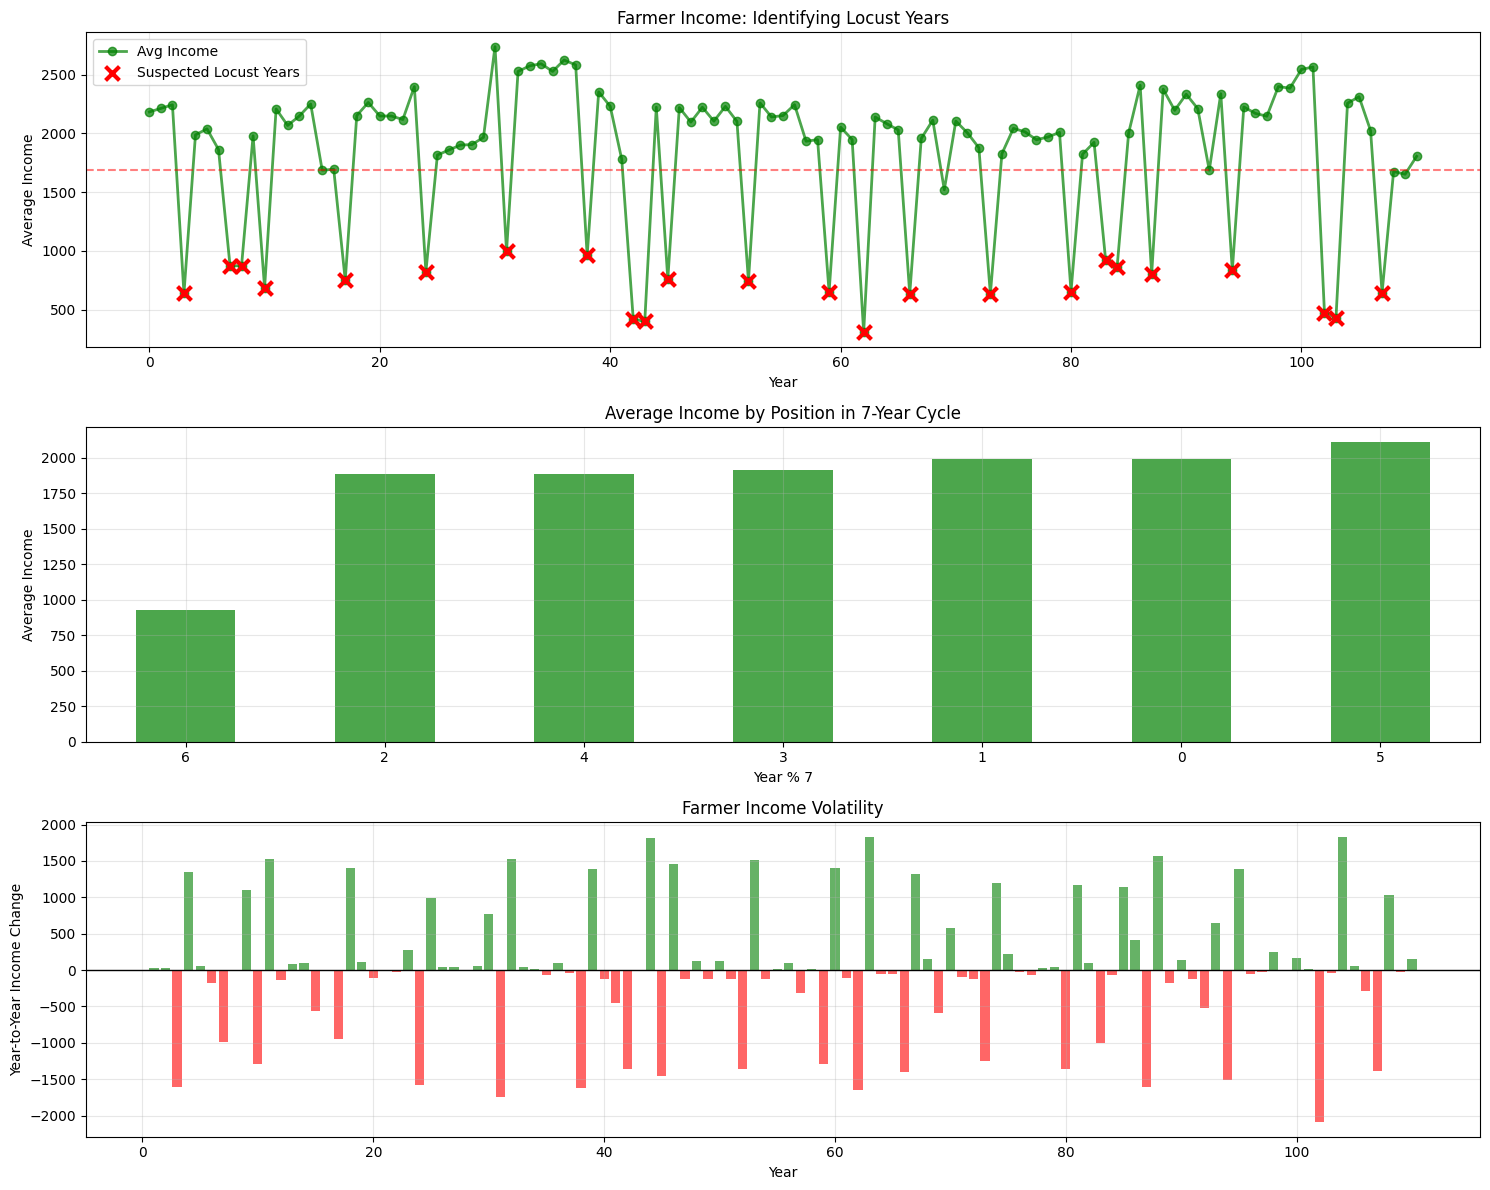


STEP 6: PATTERN HYPOTHESIS

Based on the analysis, the pattern likely follows:
1. Every 7 years: Locust infestation (LOW income)
2. Year after locust: Recovery/rebuilding (MEDIUM income)
3. Years 2-5 after locust: Normal/good farming (HIGH income)
4. Year 6 after locust: Slight decline before next locust (MEDIUM income)

Additional factors to consider:
- Long-term trends (population growth, climate change)
- Random year-to-year variation (weather)
- Possible interaction with fisher cycles


In [26]:


from scipy.stats import mode

# Farmer Income Pattern Analysis

# 1. First, let's identify the low income years (likely locust years)
print("="*70)
print("STEP 1: IDENTIFY LOCUST INFESTATION YEARS")
print("="*70)

# Find years with significantly lower income (bottom 20%)
threshold = farmer_year_income['avg_income'].quantile(0.25)
low_income_years = farmer_year_income[farmer_year_income['avg_income'] < threshold]['year'].values

print(f"\nYears with low income (< {threshold:.2f}):")
print(low_income_years)

# Check if there's a 7-year pattern
print("\nDifferences between consecutive low years:")
if len(low_income_years) > 1:
    diffs = np.diff(low_income_years)
    print(diffs)
    print(f"Average interval: {diffs.mean():.2f} years")
# check the mode of the pattern
mode_intervals= mode(low_income_years)
print(f"Most common interval: {mode_intervals}")


# 2. Analyze the pattern of high vs low years
print("\n" + "="*70)
print("STEP 2: CATEGORIZE YEARS BY INCOME LEVEL")
print("="*70)

# Create income categories
farmer_year_income['income_level'] = pd.cut(
    farmer_year_income['avg_income'], 
    bins=[0, 1000, 1800, 2700],
    labels=['Low (Locust)', 'Medium', 'High']
)

print("\nIncome distribution by category:")
print(farmer_year_income['income_level'].value_counts().sort_index())

# Show the pattern
print("\nYear-by-year pattern (first 30 years):")
for _, row in farmer_year_income.head(30).iterrows():
    symbol = "🦗" if row['income_level'] == 'Low (Locust)' else ("🌾" if row['income_level'] == 'High' else "🌱")
    print(f"Year {int(row['year']):3d}: {symbol} {row['avg_income']:6.2f} - {row['income_level']}")

# 3. Analyze potential 7-year locust cycle
print("\n" + "="*70)
print("STEP 3: TEST 7-YEAR LOCUST CYCLE HYPOTHESIS")
print("="*70)

# Check years modulo 7
farmer_year_income['year_mod_7'] = (farmer_year_income['year'] + 3) % 7
avg_by_mod7 = farmer_year_income.groupby('year_mod_7')['avg_income'].mean().sort_values()

print("\nAverage income by (year % 7):")
print(avg_by_mod7)
print(f"\nLowest income at year % 7 = {avg_by_mod7.idxmin()}")

# 4. Detect cycles and periodicities
print("\n" + "="*70)
print("STEP 4: IDENTIFY ADDITIONAL CYCLES")
print("="*70)

# Look for other patterns - 2-year alternating pattern after locust year?
farmer_year_income['income_change'] = farmer_year_income['avg_income'].diff()
print("\nLargest income increases (recovery years after locusts?):")
print(farmer_year_income.nlargest(10, 'income_change')[['year', 'avg_income', 'income_change']])

print("\nLargest income decreases (locust attack years?):")
print(farmer_year_income.nsmallest(10, 'income_change')[['year', 'avg_income', 'income_change']])

# 5. Visualize the pattern
print("\n" + "="*70)
print("STEP 5: VISUALIZE PATTERNS")
print("="*70)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# Plot 1: Income over time with locust years highlighted
ax1 = axes[0]
ax1.plot(farmer_year_income['year'], farmer_year_income['avg_income'], 
         marker='o', linewidth=2, color='green', alpha=0.7, label='Avg Income')

# Highlight suspected locust years
locust_mask = farmer_year_income['income_level'] == 'Low (Locust)'
ax1.scatter(farmer_year_income[locust_mask]['year'], 
           farmer_year_income[locust_mask]['avg_income'],
           color='red', s=100, marker='x', linewidths=3, 
           label='Suspected Locust Years', zorder=5)

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income')
ax1.set_title('Farmer Income: Identifying Locust Years')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=threshold, color='red', linestyle='--', alpha=0.5, label='Low Income Threshold')

# Plot 2: Income by year mod 7
ax2 = axes[1]
avg_by_mod7.plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_xlabel('Year % 7')
ax2.set_ylabel('Average Income')
ax2.set_title('Average Income by Position in 7-Year Cycle')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Year-to-year change
ax3 = axes[2]
ax3.bar(farmer_year_income['year'], farmer_year_income['income_change'], 
        color=['red' if x < 0 else 'green' for x in farmer_year_income['income_change']],
        alpha=0.6)
ax3.axhline(y=0, color='black', linewidth=1)
ax3.set_xlabel('Year')
ax3.set_ylabel('Year-to-Year Income Change')
ax3.set_title('Farmer Income Volatility')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Propose pattern hypothesis
print("\n" + "="*70)
print("STEP 6: PATTERN HYPOTHESIS")
print("="*70)

print("\nBased on the analysis, the pattern likely follows:")
print("1. Every 7 years: Locust infestation (LOW income)")
print("2. Year after locust: Recovery/rebuilding (MEDIUM income)")
print("3. Years 2-5 after locust: Normal/good farming (HIGH income)")
print("4. Year 6 after locust: Slight decline before next locust (MEDIUM income)")
print("\nAdditional factors to consider:")
print("- Long-term trends (population growth, climate change)")
print("- Random year-to-year variation (weather)")
print("- Possible interaction with fisher cycles")

## Retired

In [12]:
# Filter for retired
retired_pd = all_profession[all_profession['profession'] == 'retired']
retired_pd = retired_pd.reset_index(drop=True)

# Create summary statistics by year
retired_year_income = np.round(retired_pd.groupby('year')['income'].mean().reset_index(), 2)
retired_year_income = retired_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
retired_year_income['sum_income'] = np.round(retired_pd.groupby('year')['income'].sum().values, 2)
retired_year_income['num_retired'] = np.round(retired_pd.groupby('year')['income'].count().values, 2)
retired_year_income['avg_income_per_retired'] = np.round(retired_year_income['sum_income'] / retired_year_income['num_retired'], 2)
retired_year_income['avg_net_worth'] = np.round(retired_pd.groupby('year')['net_worth'].mean().values, 2)
retired_year_income['sum_net_worth'] = np.round(retired_pd.groupby('year')['net_worth'].sum().values, 2)
retired_year_income['avg_net_worth_per_retired'] = np.round(retired_year_income['sum_net_worth'] / retired_year_income['num_retired'], 2)

# Reorder the columns 
order_columns = ['year', 'num_retired', 'avg_income', 'sum_income', 'avg_income_per_retired', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_retired']
retired_year_income = retired_year_income[order_columns]

# Display first 15 rows
retired_year_income.head(15)

,year,num_retired,avg_income,sum_income,avg_income_per_retired,avg_net_worth,sum_net_worth,avg_net_worth_per_retired
0,1,9,297.48,2677.35,297.48,9749.64,87746.79,9749.64
1,2,19,319.48,6070.13,319.48,10336.42,196391.94,10336.42
2,3,28,336.69,9427.33,336.69,10872.20,304421.61,10872.20
3,4,40,327.34,13093.57,327.34,11233.05,449321.97,11233.05
4,5,39,336.67,13130.01,336.67,11468.50,447271.49,11468.50
5,6,46,373.36,17174.53,373.36,12208.02,561568.74,12208.02
6,7,46,386.18,17764.19,386.18,13227.54,608466.90,13227.54
7,8,49,414.22,20296.61,414.22,14046.84,688295.17,14046.84
8,9,51,495.15,25252.89,495.15,15675.92,799471.93,15675.92
9,10,58,553.77,32118.76,553.77,17588.32,1020122.57,17588.32


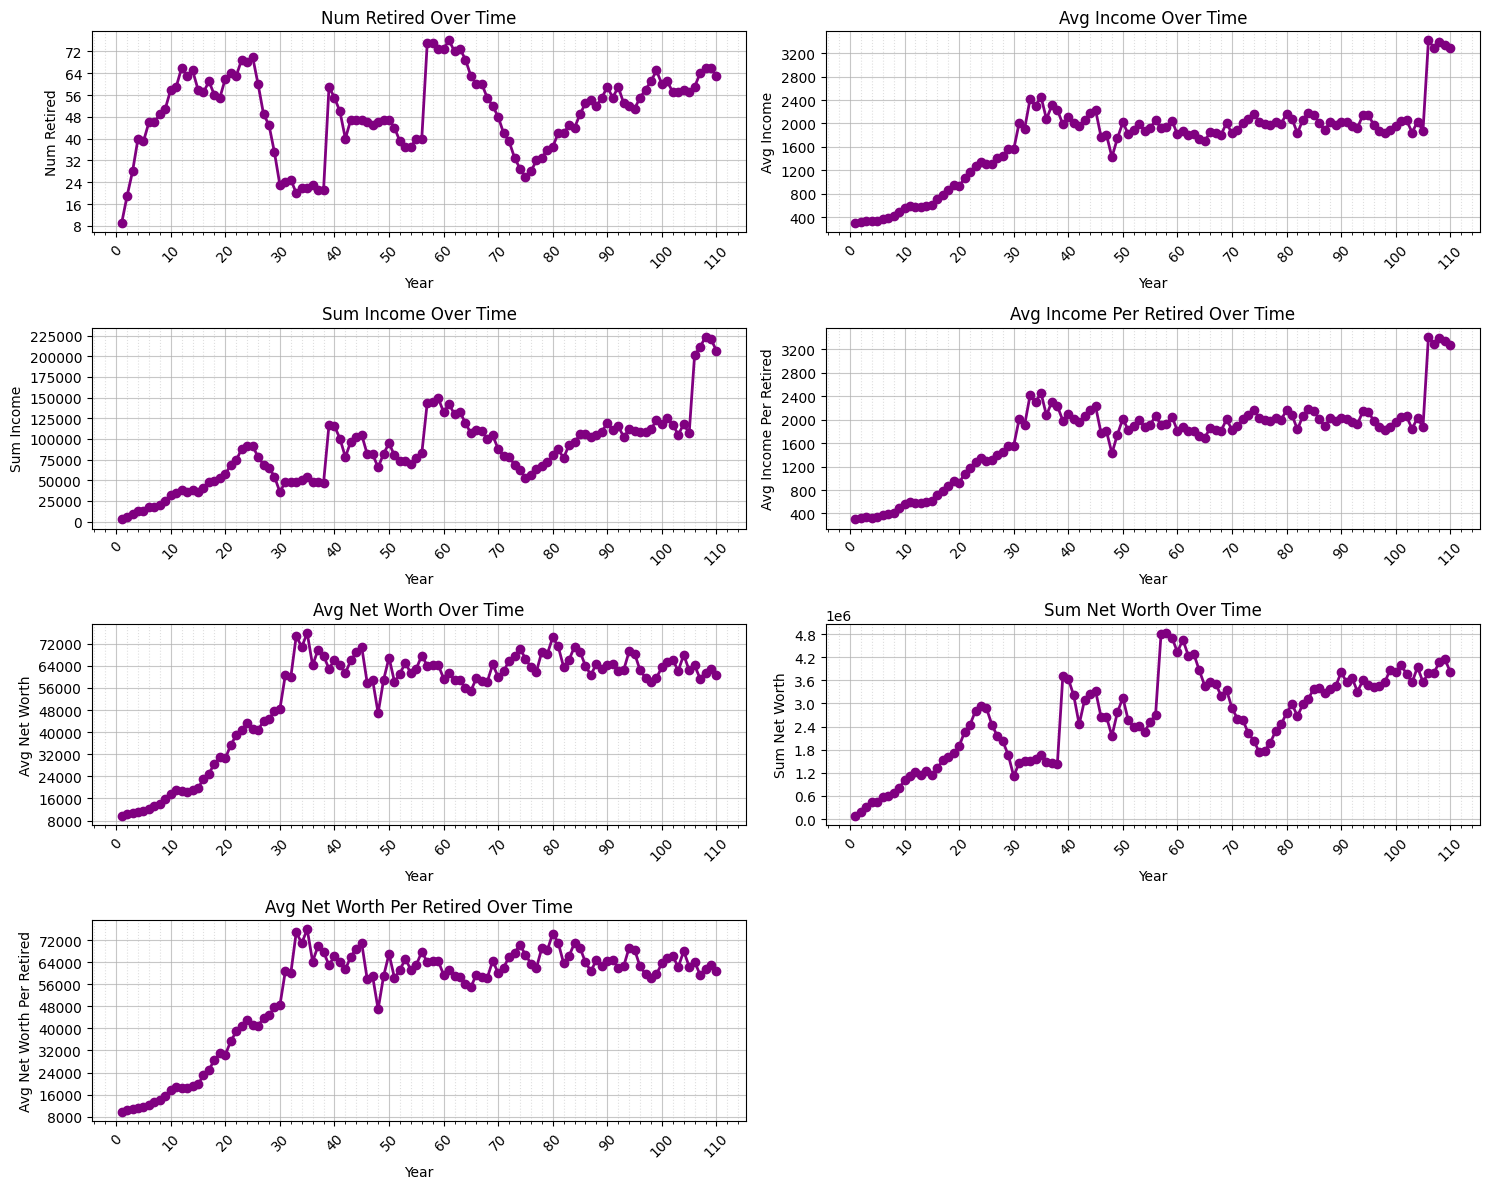

In [13]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in retired_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(retired_year_income['year'], retired_year_income[var], marker='o', linewidth=2, color='purple')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Craftsman

In [14]:
# Filter for craftsman
craftsman_pd = all_profession[all_profession['profession'] == 'craftsman']
craftsman_pd = craftsman_pd.reset_index(drop=True)

# Create summary statistics by year
craftsman_year_income = np.round(craftsman_pd.groupby('year')['income'].mean().reset_index(), 2)
craftsman_year_income = craftsman_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
craftsman_year_income['sum_income'] = np.round(craftsman_pd.groupby('year')['income'].sum().values, 2)
craftsman_year_income['num_craftsman'] = np.round(craftsman_pd.groupby('year')['income'].count().values, 2)
craftsman_year_income['avg_income_per_craftsman'] = np.round(craftsman_year_income['sum_income'] / craftsman_year_income['num_craftsman'], 2)
craftsman_year_income['avg_net_worth'] = np.round(craftsman_pd.groupby('year')['net_worth'].mean().values, 2)
craftsman_year_income['sum_net_worth'] = np.round(craftsman_pd.groupby('year')['net_worth'].sum().values, 2)
craftsman_year_income['avg_net_worth_per_craftsman'] = np.round(craftsman_year_income['sum_net_worth'] / craftsman_year_income['num_craftsman'], 2)

# Reorder the columns 
order_columns = ['year', 'num_craftsman', 'avg_income', 'sum_income', 'avg_income_per_craftsman', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_craftsman']
craftsman_year_income = craftsman_year_income[order_columns]

# Display first 15 rows
craftsman_year_income.head(15)

,year,num_craftsman,avg_income,sum_income,avg_income_per_craftsman,avg_net_worth,sum_net_worth,avg_net_worth_per_craftsman
0,0,48,4212.39,202194.79,4212.39,10000.00,480000.00,10000.00
1,1,47,4179.80,196450.72,4179.80,11815.98,555351.02,11815.98
2,2,49,4159.75,203827.80,4159.75,13487.86,660905.05,13487.86
3,3,49,4185.78,205103.10,4185.78,15217.77,745670.96,15217.77
4,4,48,3756.66,180319.58,3756.66,16580.73,795875.21,16580.73
5,5,47,3848.86,180896.27,3848.86,18150.68,853081.76,18150.68
6,6,47,3947.14,185515.56,3947.14,19263.67,905392.53,19263.67
7,7,47,2110.25,99181.87,2110.25,20083.57,943927.92,20083.57
8,8,47,4016.17,188760.20,4016.17,21850.38,1026967.83,21850.38
9,9,46,4496.02,206817.01,4496.02,23622.90,1086653.18,23622.90


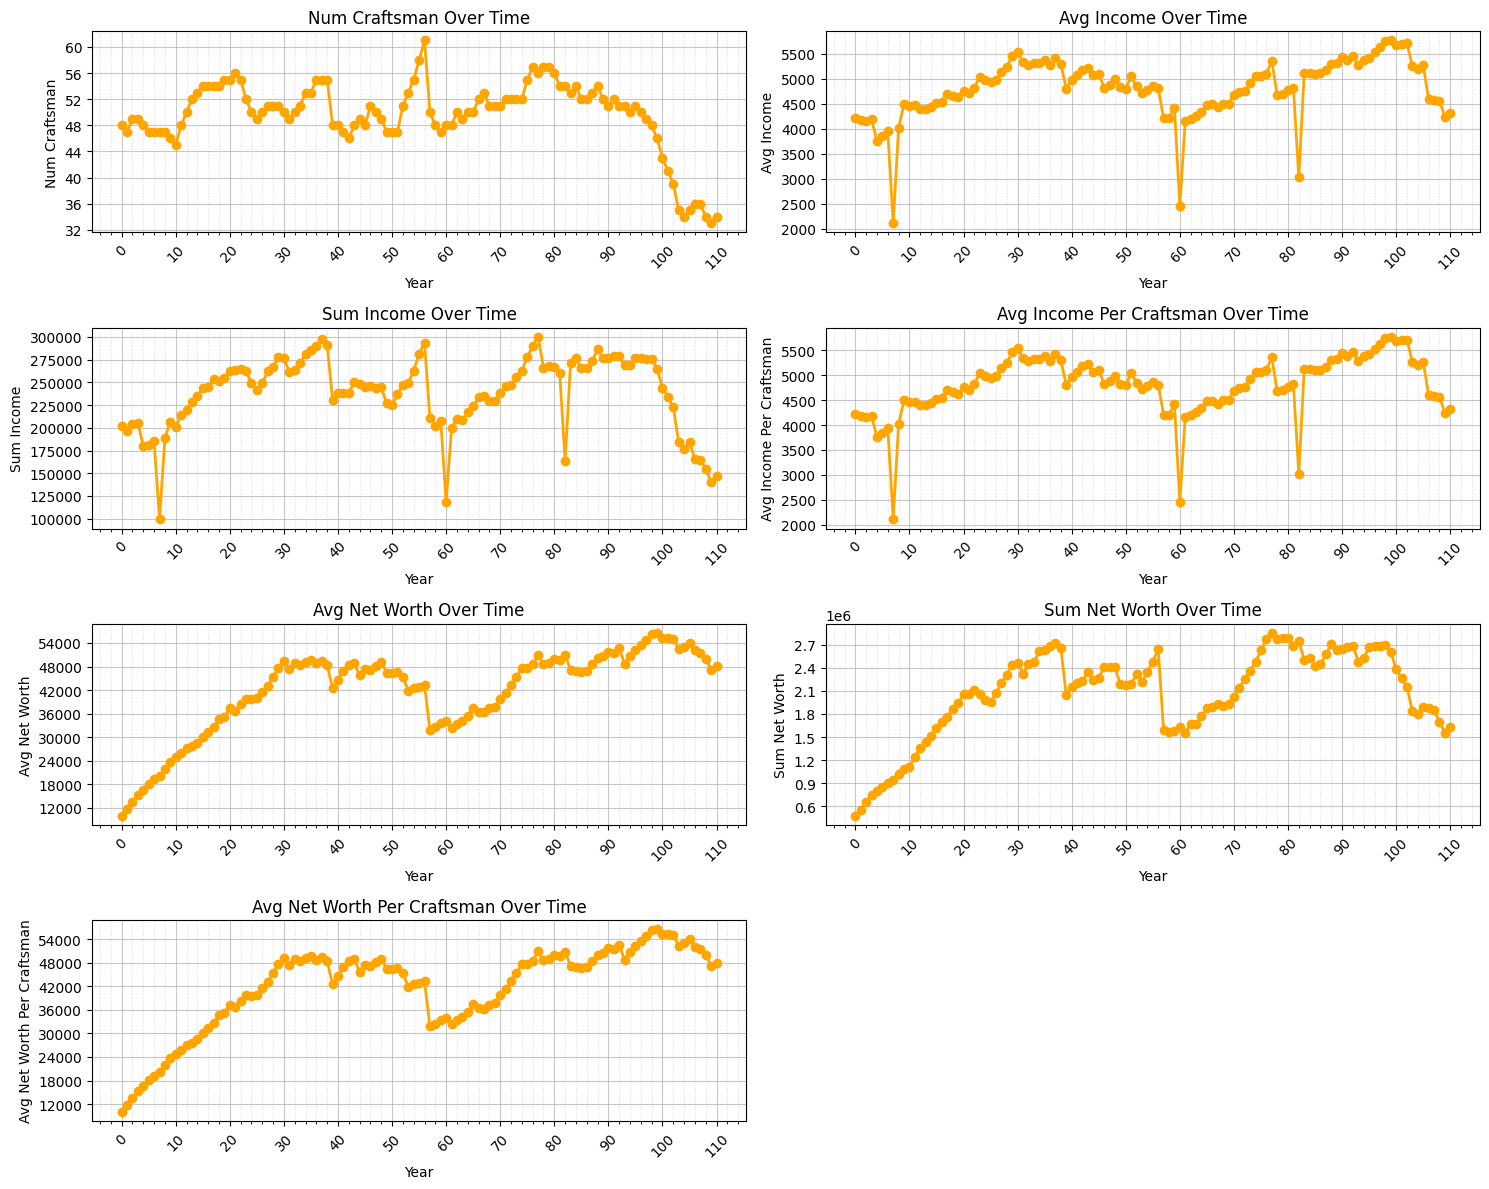

In [15]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in craftsman_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(craftsman_year_income['year'], craftsman_year_income[var], marker='o', linewidth=2, color='orange')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Civil Servant

In [16]:
# Filter for civil servant
civil_pd = all_profession[all_profession['profession'] == 'civil servant']
civil_pd = civil_pd.reset_index(drop=True)

# Create summary statistics by year
civil_year_income = np.round(civil_pd.groupby('year')['income'].mean().reset_index(), 2)
civil_year_income = civil_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
civil_year_income['sum_income'] = np.round(civil_pd.groupby('year')['income'].sum().values, 2)
civil_year_income['num_civil'] = np.round(civil_pd.groupby('year')['income'].count().values, 2)
civil_year_income['avg_income_per_civil'] = np.round(civil_year_income['sum_income'] / civil_year_income['num_civil'], 2)
civil_year_income['avg_net_worth'] = np.round(civil_pd.groupby('year')['net_worth'].mean().values, 2)
civil_year_income['sum_net_worth'] = np.round(civil_pd.groupby('year')['net_worth'].sum().values, 2)
civil_year_income['avg_net_worth_per_civil'] = np.round(civil_year_income['sum_net_worth'] / civil_year_income['num_civil'], 2)

# Reorder the columns 
order_columns = ['year', 'num_civil', 'avg_income', 'sum_income', 'avg_income_per_civil', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_civil']
civil_year_income = civil_year_income[order_columns]

# Display first 15 rows
civil_year_income.head(15)

,year,num_civil,avg_income,sum_income,avg_income_per_civil,avg_net_worth,sum_net_worth,avg_net_worth_per_civil
0,0,43,5357.96,230392.30,5357.96,10000.00,430000.00,10000.00
1,1,41,5250.54,215272.18,5250.54,12351.35,506405.27,12351.35
2,2,42,5304.66,222795.55,5304.66,14672.35,616238.78,14672.35
3,3,42,5389.68,226366.70,5389.68,16953.58,712050.28,16953.58
4,4,42,4941.21,207530.98,4941.21,19151.35,804356.88,19151.35
5,5,42,5004.30,210180.60,5004.30,21066.27,884783.17,21066.27
6,6,44,5278.77,232266.06,5278.77,22938.72,1009303.53,22938.72
7,7,43,5142.00,221106.14,5142.00,25093.84,1079035.31,25093.84
8,8,45,5162.47,232311.28,5162.47,26762.96,1204333.32,26762.96
9,9,45,5741.83,258382.49,5741.83,28728.06,1292762.51,28728.06


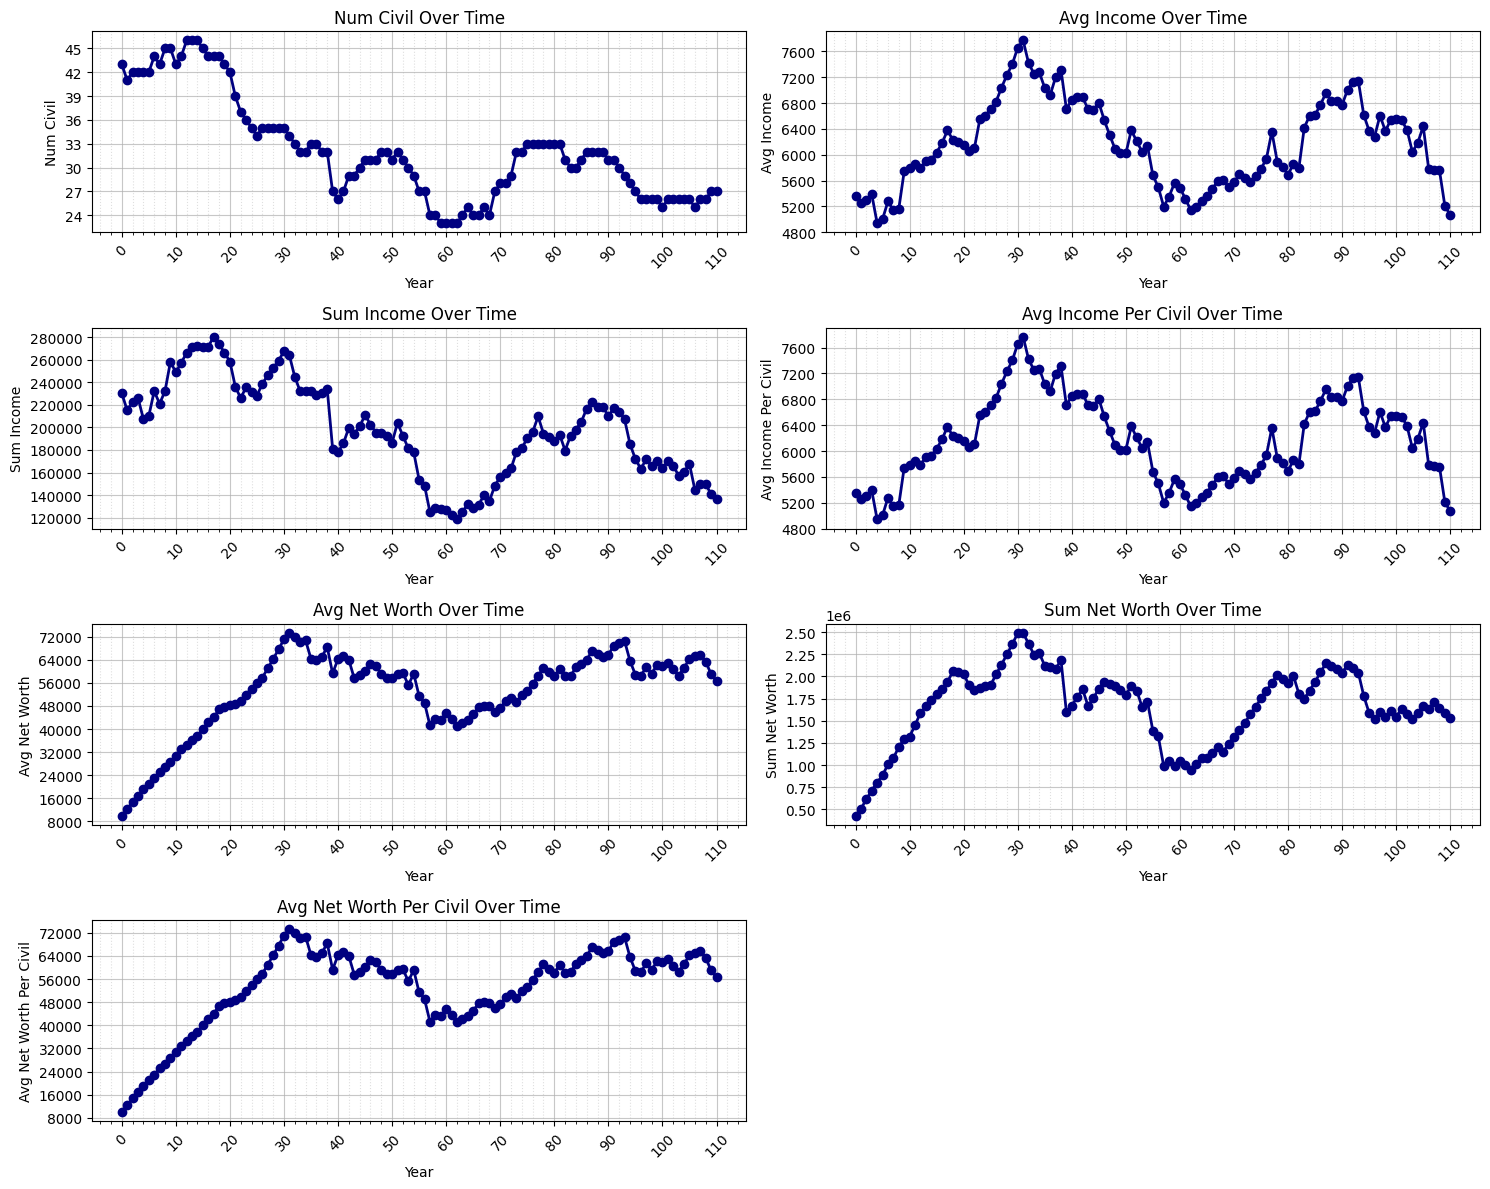

In [17]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in civil_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(civil_year_income['year'], civil_year_income[var], marker='o', linewidth=2, color='navy')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Homemaker

In [18]:
# Filter for homemaker
homemaker_pd = all_profession[all_profession['profession'] == 'homemaker']
homemaker_pd = homemaker_pd.reset_index(drop=True)

# Create summary statistics by year
homemaker_year_income = np.round(homemaker_pd.groupby('year')['income'].mean().reset_index(), 2)
homemaker_year_income = homemaker_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
homemaker_year_income['sum_income'] = np.round(homemaker_pd.groupby('year')['income'].sum().values, 2)
homemaker_year_income['num_homemaker'] = np.round(homemaker_pd.groupby('year')['income'].count().values, 2)
homemaker_year_income['avg_income_per_homemaker'] = np.round(homemaker_year_income['sum_income'] / homemaker_year_income['num_homemaker'], 2)
homemaker_year_income['avg_net_worth'] = np.round(homemaker_pd.groupby('year')['net_worth'].mean().values, 2)
homemaker_year_income['sum_net_worth'] = np.round(homemaker_pd.groupby('year')['net_worth'].sum().values, 2)
homemaker_year_income['avg_net_worth_per_homemaker'] = np.round(homemaker_year_income['sum_net_worth'] / homemaker_year_income['num_homemaker'], 2)

# Reorder the columns 
order_columns = ['year', 'num_homemaker', 'avg_income', 'sum_income', 'avg_income_per_homemaker', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_homemaker']
homemaker_year_income = homemaker_year_income[order_columns]

# Display first 15 rows
homemaker_year_income.head(15)

,year,num_homemaker,avg_income,sum_income,avg_income_per_homemaker,avg_net_worth,sum_net_worth,avg_net_worth_per_homemaker
0,0,74,202.78,15005.72,202.78,10000.00,740000.00,10000.00
1,1,77,203.27,15651.65,203.27,9655.43,743467.97,9655.43
2,2,74,196.10,14511.75,196.10,9296.79,687962.22,9296.79
3,3,72,190.96,13748.98,190.96,8998.99,647926.97,8998.99
4,4,72,163.13,11745.24,163.13,8646.85,622572.87,8646.85
5,5,72,156.19,11245.59,156.19,8320.17,599052.37,8320.17
6,6,69,157.89,10894.60,157.89,7935.27,547533.36,7935.27
7,7,72,145.13,10449.65,145.13,7695.98,554110.58,7695.98
8,8,70,139.26,9747.94,139.26,7339.76,513783.41,7339.76
9,9,69,150.19,10362.98,150.19,6896.49,475857.98,6896.49


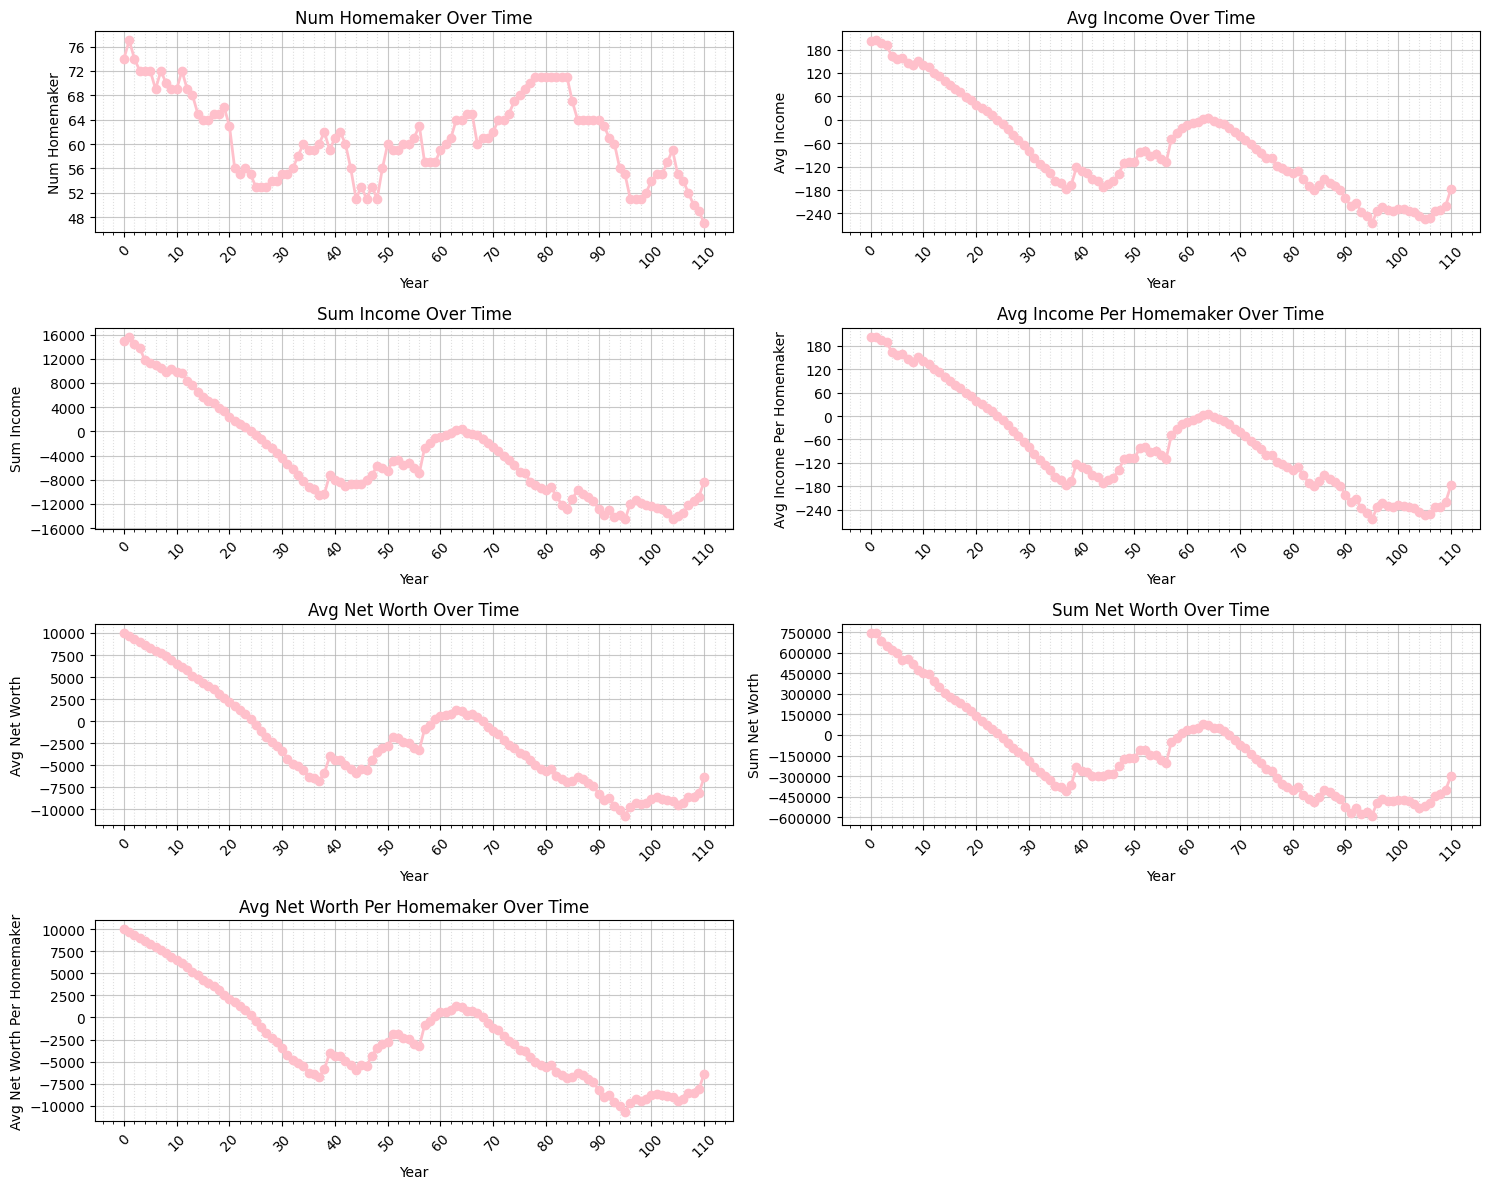

In [19]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in homemaker_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(homemaker_year_income['year'], homemaker_year_income[var], marker='o', linewidth=2, color='pink')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Child

In [20]:
# Filter for child
child_pd = all_profession[all_profession['profession'] == 'child']
child_pd = child_pd.reset_index(drop=True)

# Create summary statistics by year
child_year_income = np.round(child_pd.groupby('year')['income'].mean().reset_index(), 2)
child_year_income = child_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
child_year_income['sum_income'] = np.round(child_pd.groupby('year')['income'].sum().values, 2)
child_year_income['num_child'] = np.round(child_pd.groupby('year')['income'].count().values, 2)
child_year_income['avg_income_per_child'] = np.round(child_year_income['sum_income'] / child_year_income['num_child'], 2)
child_year_income['avg_net_worth'] = np.round(child_pd.groupby('year')['net_worth'].mean().values, 2)
child_year_income['sum_net_worth'] = np.round(child_pd.groupby('year')['net_worth'].sum().values, 2)
child_year_income['avg_net_worth_per_child'] = np.round(child_year_income['sum_net_worth'] / child_year_income['num_child'], 2)

# Reorder the columns 
order_columns = ['year', 'num_child', 'avg_income', 'sum_income', 'avg_income_per_child', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_child']
child_year_income = child_year_income[order_columns]

# Display first 15 rows
child_year_income.head(15)

,year,num_child,avg_income,sum_income,avg_income_per_child,avg_net_worth,sum_net_worth,avg_net_worth_per_child
0,0,124,0.0,0.0,0.0,10000.0,1240000.0,10000.0
1,1,121,0.0,0.0,0.0,10000.0,1210000.0,10000.0
2,2,118,0.0,0.0,0.0,10000.0,1180000.0,10000.0
3,3,113,0.0,0.0,0.0,10000.0,1130000.0,10000.0
4,4,109,0.0,0.0,0.0,10000.0,1090000.0,10000.0
5,5,107,0.0,0.0,0.0,10000.0,1070000.0,10000.0
6,6,103,0.0,0.0,0.0,10000.0,1030000.0,10000.0
7,7,99,0.0,0.0,0.0,10000.0,990000.0,10000.0
8,8,95,0.0,0.0,0.0,10000.0,950000.0,10000.0
9,9,92,0.0,0.0,0.0,10000.0,920000.0,10000.0


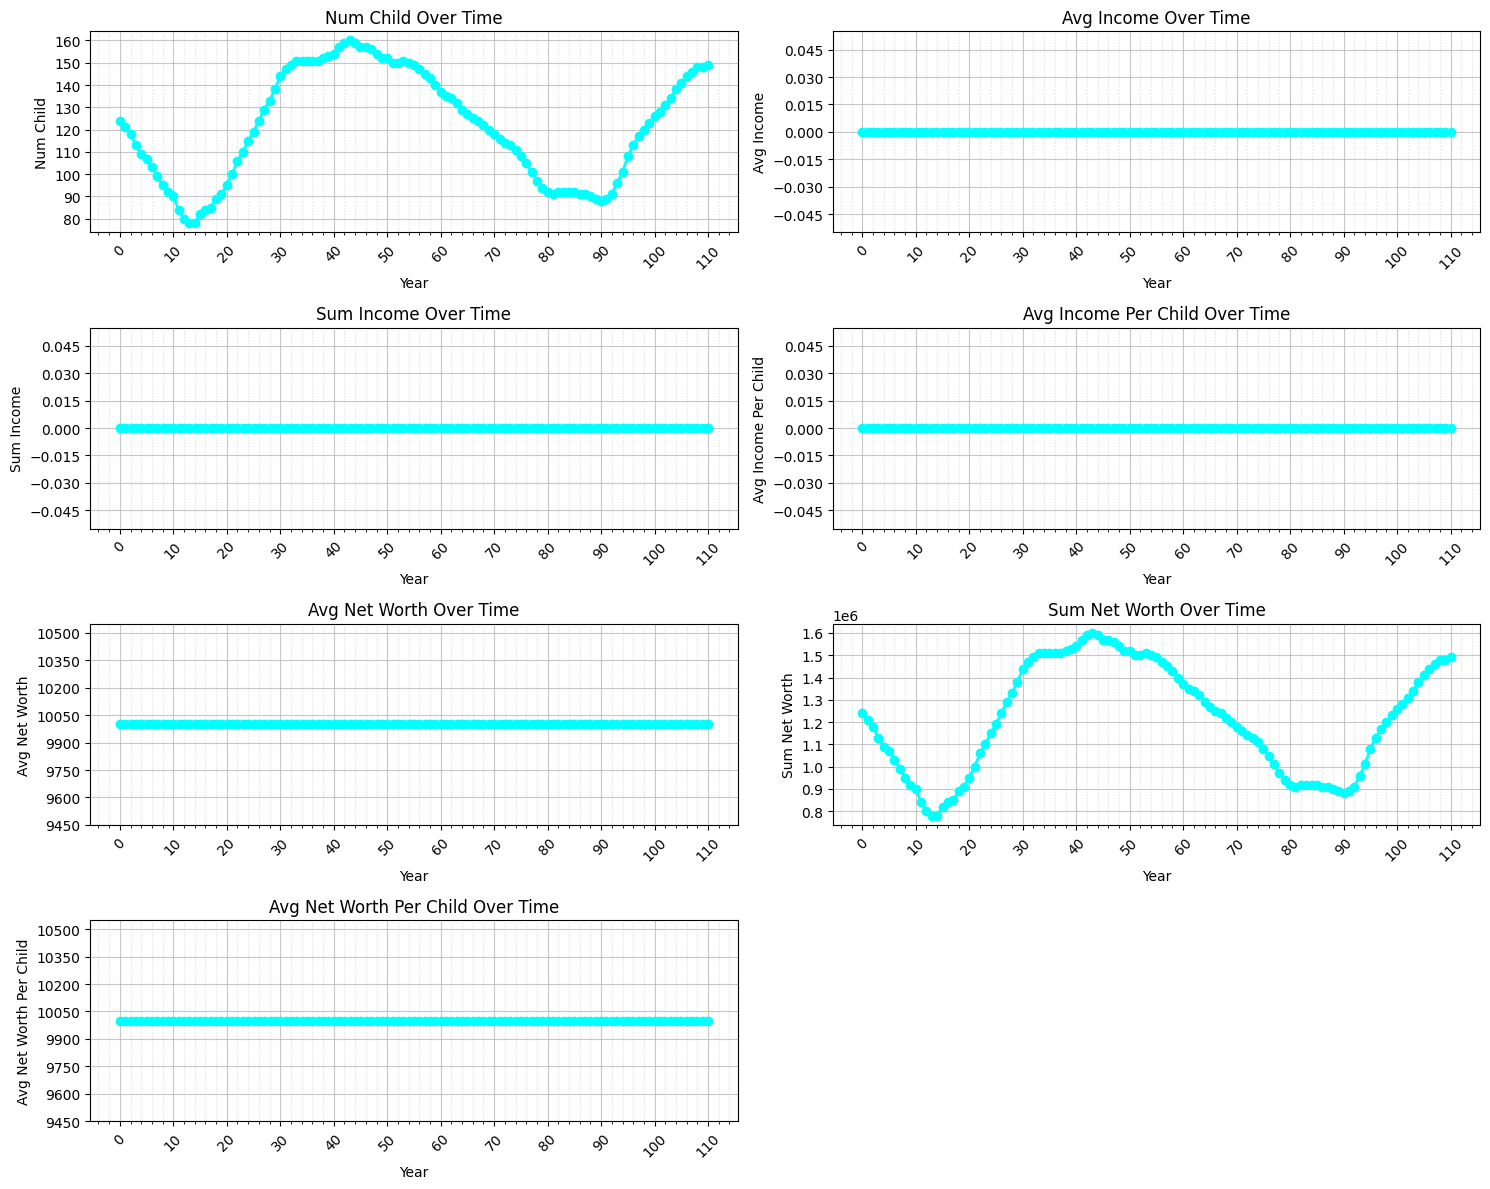

In [21]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in child_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(child_year_income['year'], child_year_income[var], marker='o', linewidth=2, color='cyan')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Unemployed

In [22]:
# Filter for unemployed
unemployed_pd = all_profession[all_profession['profession'] == 'unemployed']
unemployed_pd = unemployed_pd.reset_index(drop=True)

# Create summary statistics by year
unemployed_year_income = np.round(unemployed_pd.groupby('year')['income'].mean().reset_index(), 2)
unemployed_year_income = unemployed_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
unemployed_year_income['sum_income'] = np.round(unemployed_pd.groupby('year')['income'].sum().values, 2)
unemployed_year_income['num_unemployed'] = np.round(unemployed_pd.groupby('year')['income'].count().values, 2)
unemployed_year_income['avg_income_per_unemployed'] = np.round(unemployed_year_income['sum_income'] / unemployed_year_income['num_unemployed'], 2)
unemployed_year_income['avg_net_worth'] = np.round(unemployed_pd.groupby('year')['net_worth'].mean().values, 2)
unemployed_year_income['sum_net_worth'] = np.round(unemployed_pd.groupby('year')['net_worth'].sum().values, 2)
unemployed_year_income['avg_net_worth_per_unemployed'] = np.round(unemployed_year_income['sum_net_worth'] / unemployed_year_income['num_unemployed'], 2)

# Reorder the columns 
order_columns = ['year', 'num_unemployed', 'avg_income', 'sum_income', 'avg_income_per_unemployed', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_unemployed']
unemployed_year_income = unemployed_year_income[order_columns]

# Display first 15 rows
unemployed_year_income.head(15)

,year,num_unemployed,avg_income,sum_income,avg_income_per_unemployed,avg_net_worth,sum_net_worth,avg_net_worth_per_unemployed
0,0,44,193.52,8514.85,193.52,10000.00,440000.00,10000.00
1,1,46,193.89,8918.73,193.89,9646.05,443718.09,9646.05
2,2,45,189.15,8511.68,189.15,9282.39,417707.75,9282.39
3,3,44,186.23,8194.26,186.23,8980.18,395127.87,8980.18
4,4,43,161.58,6947.84,161.58,8589.53,369349.65,8589.53
5,5,44,157.10,6912.45,157.10,8266.87,363742.46,8266.87
6,6,44,158.50,6974.04,158.50,7926.72,348775.63,7926.72
7,7,44,148.08,6515.64,148.08,7604.35,334591.47,7604.35
8,8,45,144.00,6480.12,144.00,7319.02,329355.94,7319.02
9,9,45,154.81,6966.27,154.81,6887.75,309948.62,6887.75


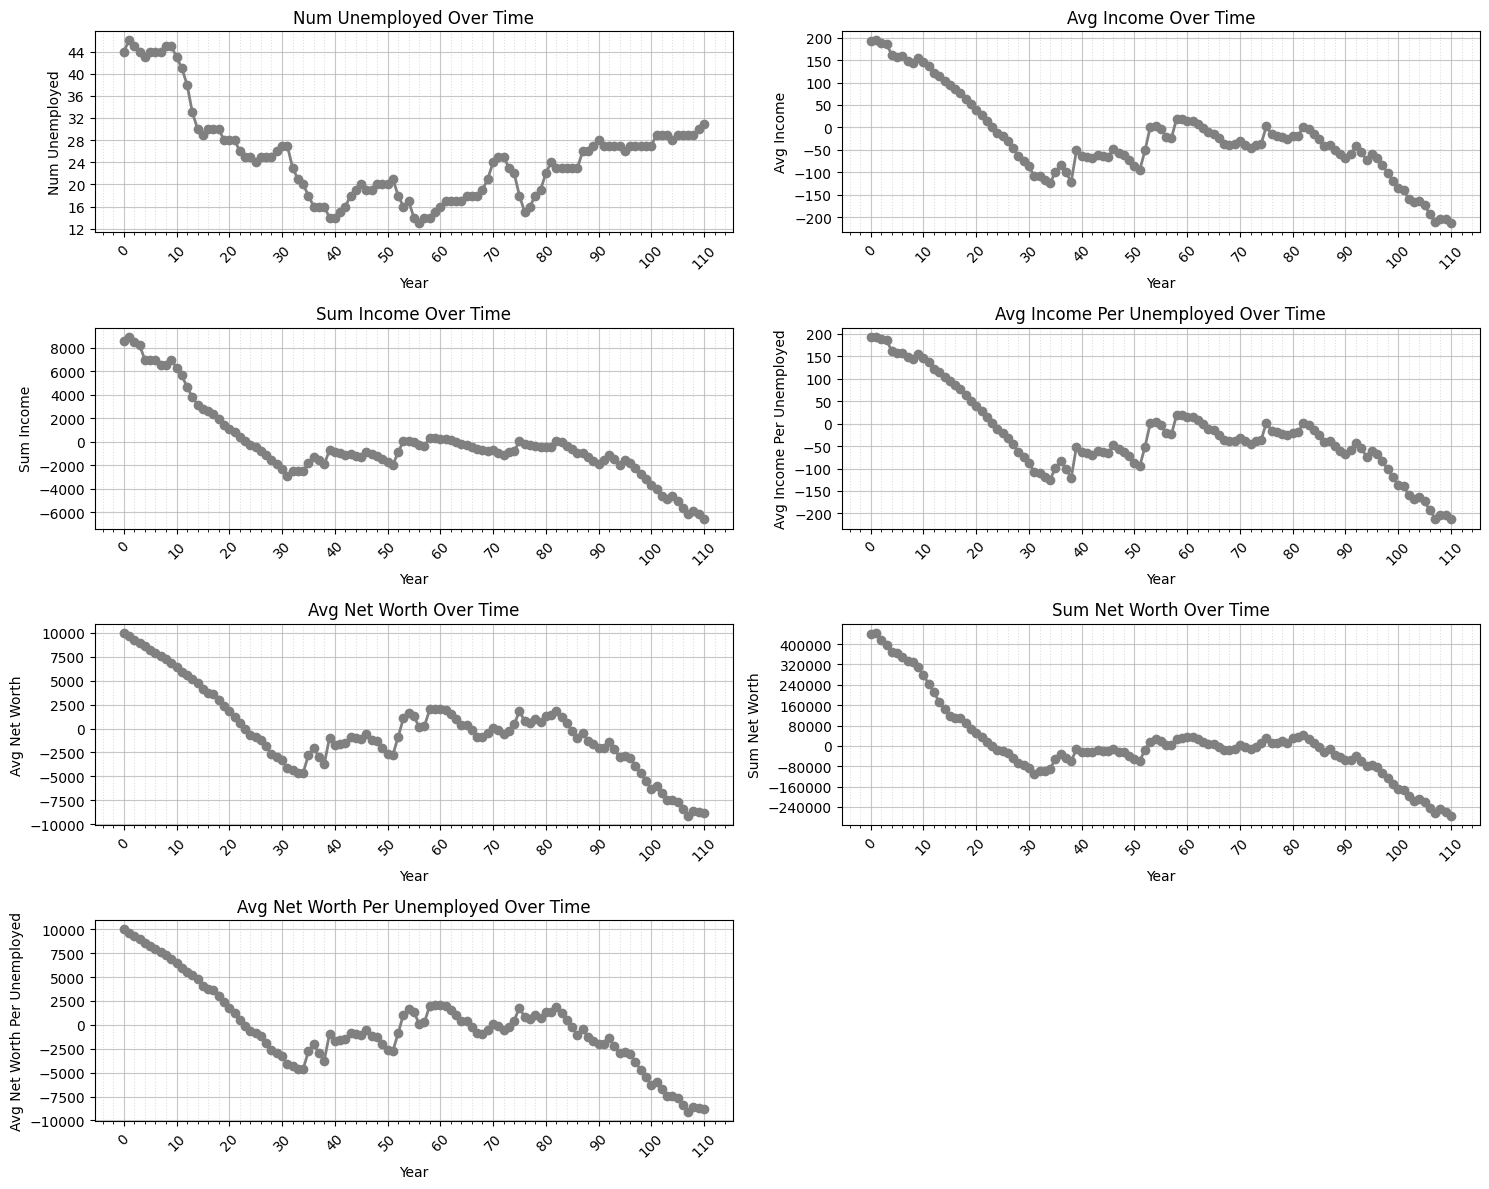

In [23]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in unemployed_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(unemployed_year_income['year'], unemployed_year_income[var], marker='o', linewidth=2, color='gray')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()

## Service Provider

In [24]:
# Filter for service provider
service_pd = all_profession[all_profession['profession'] == 'service provider']
service_pd = service_pd.reset_index(drop=True)

# Create summary statistics by year
service_year_income = np.round(service_pd.groupby('year')['income'].mean().reset_index(), 2)
service_year_income = service_year_income.rename(columns={'income': 'avg_income'})

# Add columns with sum of all income
service_year_income['sum_income'] = np.round(service_pd.groupby('year')['income'].sum().values, 2)
service_year_income['num_service'] = np.round(service_pd.groupby('year')['income'].count().values, 2)
service_year_income['avg_income_per_service'] = np.round(service_year_income['sum_income'] / service_year_income['num_service'], 2)
service_year_income['avg_net_worth'] = np.round(service_pd.groupby('year')['net_worth'].mean().values, 2)
service_year_income['sum_net_worth'] = np.round(service_pd.groupby('year')['net_worth'].sum().values, 2)
service_year_income['avg_net_worth_per_service'] = np.round(service_year_income['sum_net_worth'] / service_year_income['num_service'], 2)

# Reorder the columns 
order_columns = ['year', 'num_service', 'avg_income', 'sum_income', 'avg_income_per_service', 'avg_net_worth', 'sum_net_worth', 'avg_net_worth_per_service']
service_year_income = service_year_income[order_columns]

# Display first 15 rows
service_year_income.head(15)

,year,num_service,avg_income,sum_income,avg_income_per_service,avg_net_worth,sum_net_worth,avg_net_worth_per_service
0,0,41,5215.76,213846.07,5215.76,10000.00,410000.00,10000.00
1,1,40,5203.42,208136.70,5203.42,12327.79,493111.46,12327.79
2,2,40,5131.33,205253.05,5131.33,14442.76,577710.55,14442.76
3,3,41,5191.45,212849.53,5191.45,16688.18,684215.57,16688.18
4,4,41,4849.11,198813.69,4849.11,18839.91,772436.39,18839.91
5,5,41,5041.77,206712.37,5041.77,21104.89,865300.47,21104.89
6,6,41,5254.53,215435.87,5254.53,23039.01,944599.58,23039.01
7,7,42,5113.65,214773.27,5113.65,25050.16,1052106.76,25050.16
8,8,41,5074.33,208047.58,5074.33,26543.61,1088288.13,26543.61
9,9,42,5627.25,236344.47,5627.25,28026.21,1177100.91,28026.21


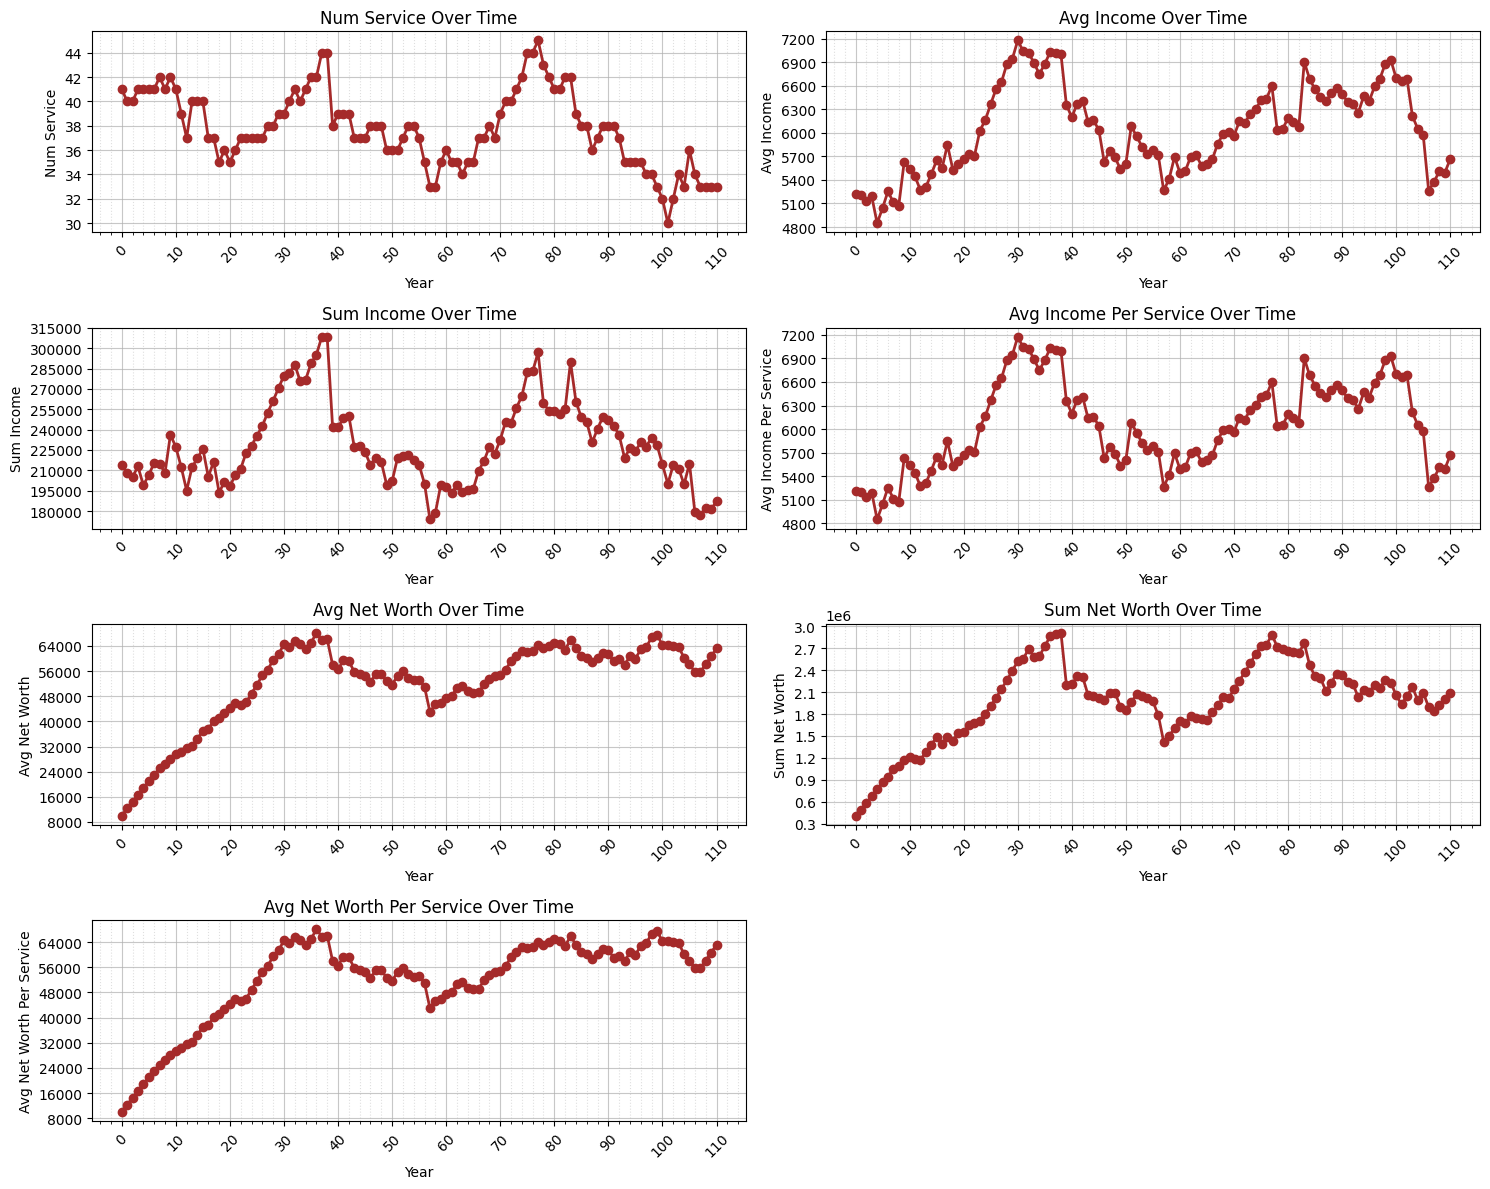

In [25]:
# Graph of all variables 
# Create subplots for each variable (excluding 'year')
variables = [col for col in service_year_income.columns if col != 'year']
n_vars = len(variables)

# Create a grid of subplots (2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot each variable
for idx, var in enumerate(variables):
    ax = axes[idx]
    ax.plot(service_year_income['year'], service_year_income[var], marker='o', linewidth=2, color='brown')
    ax.set_xlabel('Year')
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'{var.replace("_", " ").title()} Over Time')
    
    # Set grid
    ax.grid(True, which='major', linestyle='-', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', alpha=0.4)
    
    # Set major ticks every 5 years, minor ticks every 2 years
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot (since we have 7 variables but 8 subplots)
fig.delaxes(axes[-1])

plt.tight_layout()